### importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Dataset Attributes

* survival:	Survival     where; 0 = No, 1 = Yes
* pclass:	Ticket class    	where; 1 = 1st, 2 = 2nd, 3 = 3rd
* sex:	Sex	
* Age:	Age in years	
* sibsp:	# of siblings / spouses aboard the Titanic	
* parch:	# of parents / children aboard the Titanic	
* ticket:	Ticket number	
* fare:	Passenger fare	
* cabin:	Cabin number	
* embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

### loading file

In [2]:
df = pd.read_csv(r"C:\Users\chira\Downloads\train.csv")

In [3]:
dfc = df.copy()

### viewing dataset

In [4]:
dfc

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
dfc.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Inference: Cabin column has many missing values.

In [6]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


INFERENCES:
* Age column has considerable null values, so we won't drop the rows here.
* Cabin has many null values.
* Embarked has 2 null values.

### Filtering Dataset

In [7]:
#dropping PassengerId,Name,Ticket and Cabin column
dfc.drop(columns=['PassengerId','Cabin','Name','Ticket'],inplace=True)

In [8]:
dfc.dropna(axis=0,how='any',subset=['Embarked'],inplace=True)

### Handling missing values

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

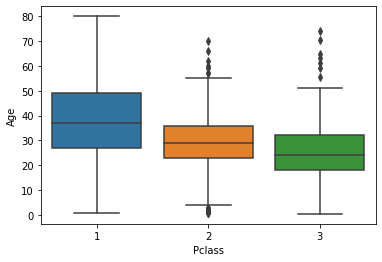

In [9]:
sns.boxplot(x='Pclass',y='Age',data=dfc)

In [10]:
#on the basis of Pclass we are filling the missing age 
#dfc2=df.copy()
#dfc.groupby('Pclass')['Age'].median()

In [11]:
dfc["Age"].median()

28.0

In [12]:
#dfc2['Age'] = dfc2[dfc2['Pclass']==1]['Age'].fillna(37.0)
#dfc2['Age'] = dfc2[dfc2['Pclass']==2]['Age'].fillna(29.0)
#dfc2['Age'] = dfc2[dfc2['Pclass']==3]['Age'].fillna(24.0)
dfc['Age'] = dfc['Age'].fillna(28.0)

In [13]:
dfc['Age'].isnull().sum()

0

#### Basic Analysis

In [14]:
dfc.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
gender_survived_count= dfc.groupby('Sex')['Survived'].value_counts()
gender_survived_count

Sex     Survived
female  1           231
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

Inference:
* Female were saved more than male or female survived more in comparison to male.


### Converting 'Sex' column to 0 and 1

In [16]:
gender = pd.get_dummies(dfc['Sex'],drop_first=True)
embark = pd.get_dummies(dfc['Embarked'],drop_first=True)

In [17]:
dfc= pd.concat([dfc,gender,embark],axis=1)

In [18]:
dfc.drop(['Sex','Embarked'],axis=1,inplace=True)

#### Data visualization

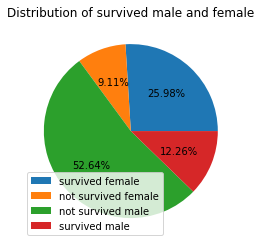

In [19]:
plt.title('Distribution of survived male and female')
plt.pie(gender_survived_count, autopct= '%0.2f%%')
plt.legend(['survived female','not survived female','not survived male','survived male']);

<AxesSubplot:>

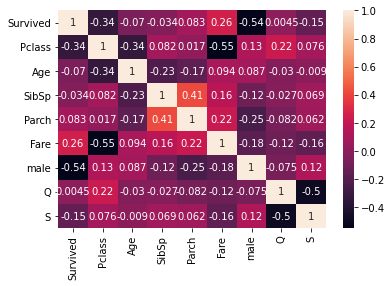

In [20]:
sns.heatmap(dfc.corr(),annot=True)

Inference:
Fare and survived are highly correlated.

<AxesSubplot:xlabel='Survived', ylabel='count'>

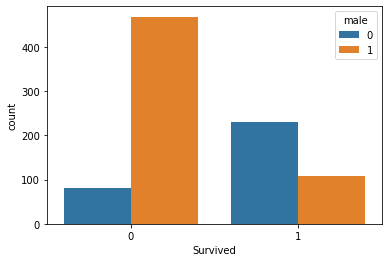

In [21]:
sns.countplot(x='Survived',hue='male',data=dfc)

<AxesSubplot:xlabel='Survived', ylabel='count'>

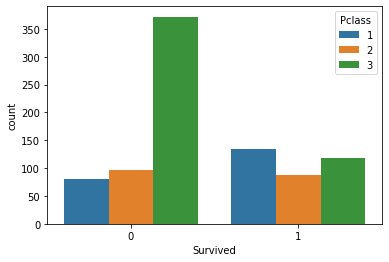

In [22]:
sns.countplot(x='Survived',hue='Pclass',data=dfc)

c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

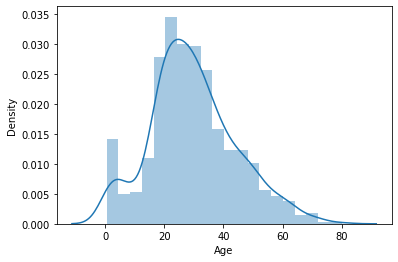

In [23]:
sns.distplot(df['Age'],bins=20)

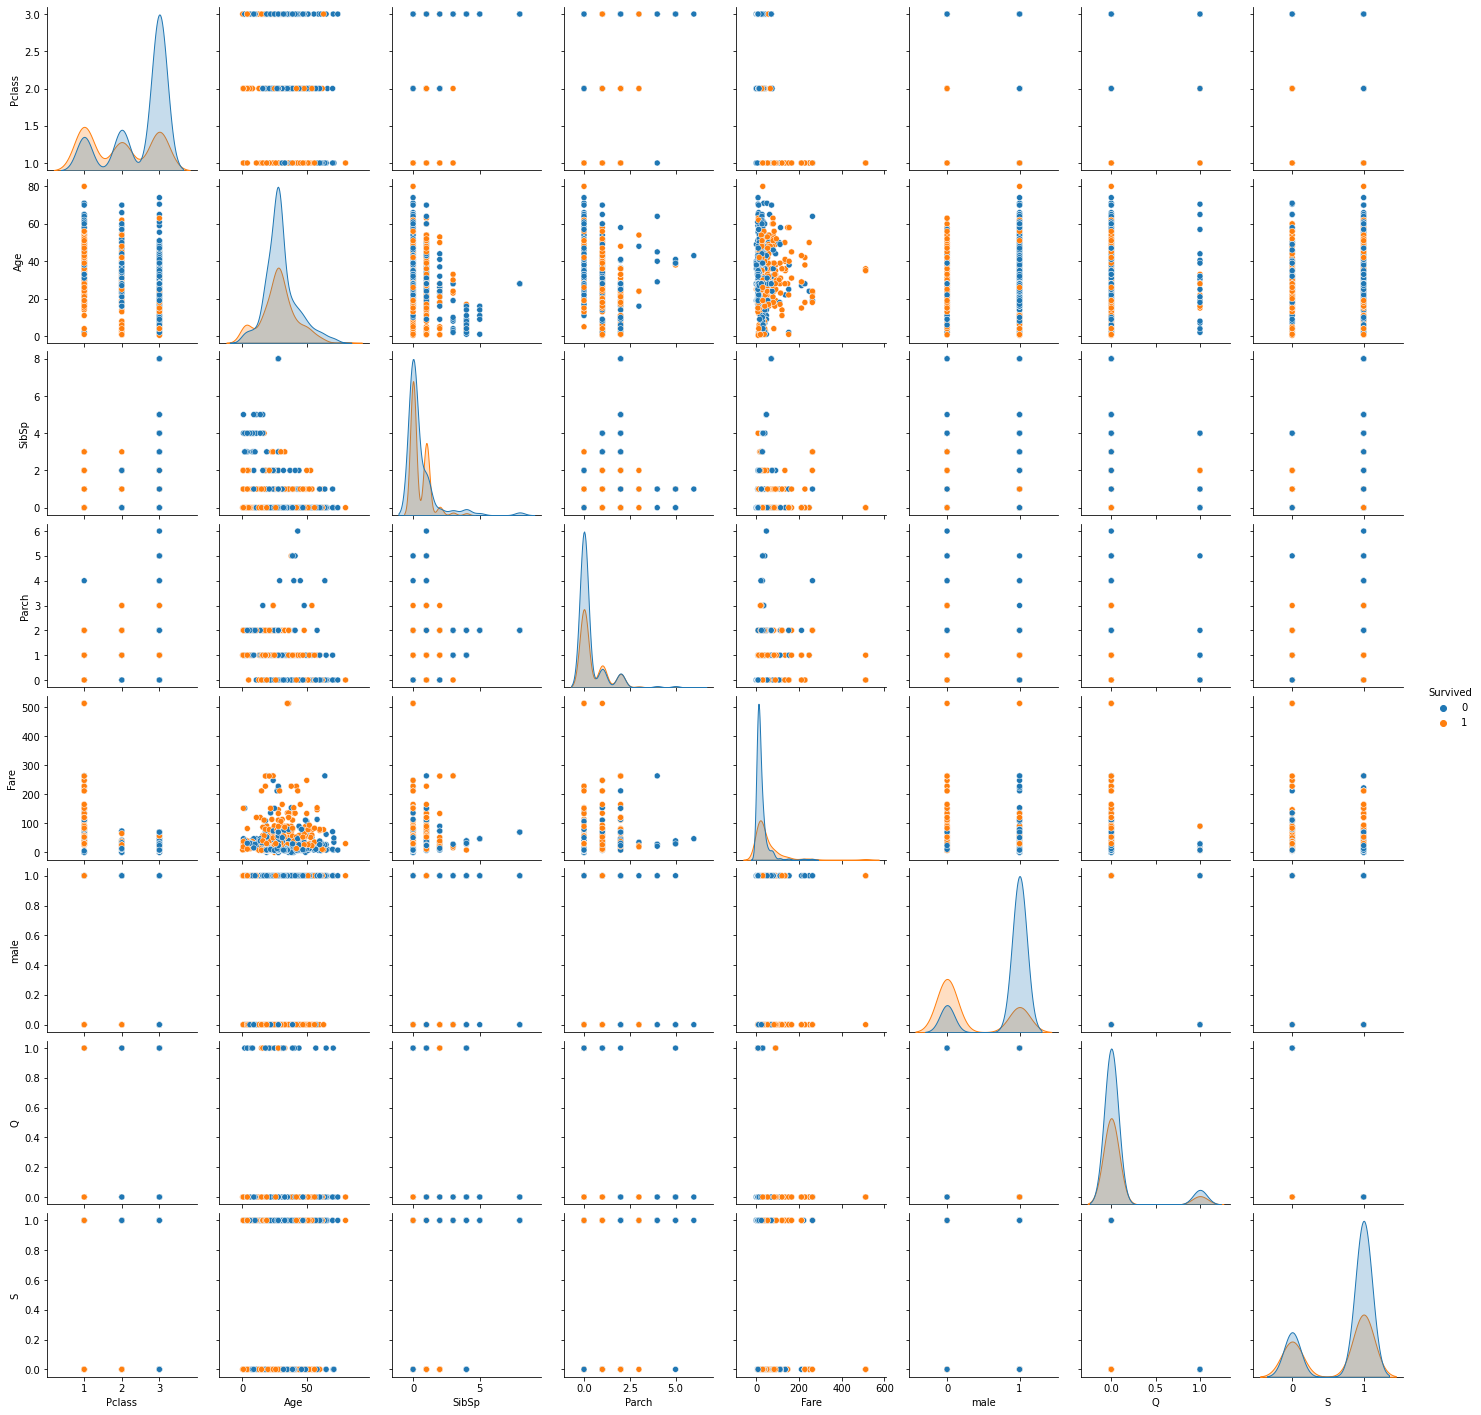

In [24]:
sns.pairplot(dfc,hue="Survived")

In [25]:
x=dfc.drop('Survived',axis=1)
y=dfc['Survived']

### Training the model

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [28]:
from sklearn.linear_model import LogisticRegression

### creating an instance of logistic regression model say lgm

In [29]:
lgm = LogisticRegression()

In [30]:
lgm.fit(x_train,y_train)

c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Predicting test data

In [31]:
predictions = lgm.predict(x_test)

### Evaluating the model

In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.84      0.68      0.75       104

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267



In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
confusion_matrix(y_test,predictions)

array([[149,  14],
       [ 33,  71]], dtype=int64)

## SVM(support vector machine)

In [36]:
x1=dfc.drop('Survived',axis=1)
y1=dfc['Survived']

In [37]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [38]:
from sklearn.svm import SVC

In [39]:
svc_model = SVC(kernel='rbf')

In [40]:
svc_model.fit(x1_train,y1_train)

SVC()

In [41]:
predictions1 = svc_model.predict(x1_test)

In [42]:
from sklearn.metrics import confusion_matrix,classification_report

In [43]:
confusion_matrix(y1_test,predictions1)

array([[145,  18],
       [ 72,  32]], dtype=int64)

In [44]:
print(classification_report(y1_test,predictions1))

              precision    recall  f1-score   support

           0       0.67      0.89      0.76       163
           1       0.64      0.31      0.42       104

    accuracy                           0.66       267
   macro avg       0.65      0.60      0.59       267
weighted avg       0.66      0.66      0.63       267



### GridSearchCV
function in SKlearn's model_selection package helpsto loop through predefined hyperparameters and fit your estimator (model) on your training set.

* Hyperparameters: parameter whose value is used to control the learning process.

model_selection.GridSearchCV(estimator, param_grid,scoring=None,
          n_jobs=None, iid='deprecated', refit=True, cv=None, verbose=0, 
          pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)

1.estimator: Pass the model instance for which you want to check the hyperparameters.
2.params_grid: the dictionary object that holds the hyperparameters you want to try
3.scoring: evaluation metric that you want to use, you can simply pass a valid string/ object of evaluation metric
4.cv: number of cross-validation you have to try for each selected set of hyperparameters
5.verbose: you can set it to 1 to get the detailed print out while you fit the data to GridSearchCV
6.n_jobs: number of processes you wish to run in parallel for this task if it -1 it will use all available processors. 

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}  
   
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1) 

# fitting the model for grid search 
grid.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [47]:
grid.predictions = grid.predict(x_test)

In [48]:
from sklearn.metrics import confusion_matrix,classification_report

In [49]:
print(classification_report(y1_test,predictions1))

              precision    recall  f1-score   support

           0       0.67      0.89      0.76       163
           1       0.64      0.31      0.42       104

    accuracy                           0.66       267
   macro avg       0.65      0.60      0.59       267
weighted avg       0.66      0.66      0.63       267



## KNN

In [50]:
from sklearn.cluster import KMeans

In [51]:
accuracy_rate = []
from sklearn import metrics
for i in range (1,30):
    k_means = KMeans(n_clusters=i).fit(x_train,y_train)
    pred_i = k_means.predict(x_test)
    #score=cross_val_score(k_means,predictions2,y_test,cv=10)
    accuracy_rate.append(metrics.accuracy_score(y_test,pred_i))

Text(0, 0.5, 'accuracy_rate')

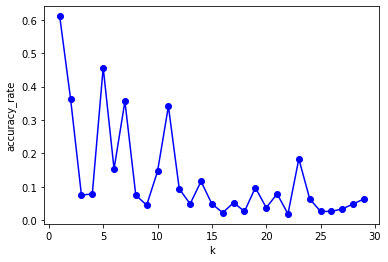

In [52]:
plt.plot(range(1,30),accuracy_rate,'b-o')
plt.xlabel('k')
plt.ylabel('accuracy_rate')

In [53]:
k_means = KMeans(n_clusters=2)

In [54]:
k_means.fit(x_train,y_train)

KMeans(n_clusters=2)

In [55]:
k_means.cluster_centers_

array([[ 2.36470588e+00,  2.92508403e+01,  5.17647059e-01,
         3.49579832e-01,  2.35937879e+01,  6.55462185e-01,
         8.90756303e-02,  7.37815126e-01],
       [ 1.00000000e+00,  3.09629630e+01,  6.66666667e-01,
         1.00000000e+00,  2.27208952e+02,  2.96296296e-01,
        -1.38777878e-17,  4.81481481e-01]])

In [56]:
predictions2 = k_means.predict(x_test)
predictions2

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [57]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,predictions2))

[[161   2]
 [ 95   9]]


In [58]:
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.63      0.99      0.77       163
           1       0.82      0.09      0.16       104

    accuracy                           0.64       267
   macro avg       0.72      0.54      0.46       267
weighted avg       0.70      0.64      0.53       267



## Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
dt = DecisionTreeClassifier()

In [61]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [62]:
predictions3 = dt.predict(x_test)

In [63]:
print(confusion_matrix(y_test,predictions3))

[[134  29]
 [ 27  77]]


In [64]:
print(classification_report(y_test,predictions3))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       163
           1       0.73      0.74      0.73       104

    accuracy                           0.79       267
   macro avg       0.78      0.78      0.78       267
weighted avg       0.79      0.79      0.79       267



## Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf = RandomForestClassifier(n_estimators=60)

In [67]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=60)

In [68]:
predictions4 = rf.predict(x_test)

In [69]:
print(confusion_matrix(y_test,predictions4))

[[141  22]
 [ 28  76]]


In [70]:
print(classification_report(y_test,predictions4))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       163
           1       0.78      0.73      0.75       104

    accuracy                           0.81       267
   macro avg       0.80      0.80      0.80       267
weighted avg       0.81      0.81      0.81       267

